In [100]:
#Auteurs : Maud Moerel-Martini et Marc-Antoine Dufresne Gagnon
#Projet   : IFT2015 - Structure de Donnees - TP1

import numpy as np
import math as math
import matplotlib.pyplot as plt
%matplotlib inline

In [171]:
class SparseMatrix:

    def __init__(self, fromiter, shape):
        n, m = shape
        self.shape = shape
        self.n = n
        self.m = m
        self.nnz = 0 # TODO: nombre de valeurs non-nulles
        self.rowptr = [0] # liste de taille n + 1 des intervalles des colonnes, commence a 0
        self.colind = [] # liste de taille nnz des indices des valeurs non-nulles
        
############### Methode simple, plusieurs loops, possible plus petit ? #######TODO
        self.data = [] # liste de taille nnz des valeurs non-nulles
        
        for i,e in enumerate(fromiter):#Chaque range de la matrice
            nombre_valeurs_range=0 #Compteur pour utiliser le nombre de laveurs sur la range
            for j,f in enumerate(e):#Chaque valeur de la range de la matrice
                if(f != 0):#valeur != 0
                    nombre_valeurs_range += 1 
                    self.nnz += 1
                    self.colind.append(j)#On ajoute les indice de colonnes correxpondant aux valeurs 
                    self.data.append(f)#On ajoute la valeur dans le tableau des valeurs
            self.rowptr.append((self.rowptr[len(self.rowptr)-1]+nombre_valeurs_range)) # valeur precedente de rowptr + nombre valeurs sur range
        
#        indices_matrice = np.nonzero(fromiter)
 #       self.colind = indices_matrice[len(indices_matrice)-1]
  #      indices_ranges = indices_matrice[len(indices_matrice)-2]
             
    def __getitem__(self, k): #TODO il faut verifier et ajouter le error handling si i ou j est plus quand que n et m, ou plus petit que 0, ou None
        i, j = k # i est la colonne, j la range
            
        indices_range = range(self.rowptr[i], self.rowptr[i+1])#contient les indices de colind et data où les colonnes et les valeurs non-nulles de la rangée i sont stockées.
                
        while indices_range:
            k = math.floor(len(indices_range)/2)
            if self.colind[indices_range[k]] is j:
                return self.data[indices_range[k]] # Pours toutes les valeurs non nulles, nous verifions si la colonne est pour cette range a une valeur. si oui, on la retourne
            elif self.colind[indices_range[k]] > j:
                indices_range = indices_range[0:math.floor(len(indices_range)/2)]
            elif self.colind[indices_range[k]] < j:
                indices_range = indices_range[math.ceil(len(indices_range)/2):len(indices_range)]
                
        return 0  # Si non, on retourne 0
    
    def todense(self):
    #######Methode simple, plusieurs loops#######
        #dense = [] #initialization de la matrice
        #nbr_val_place = 0 #compteur pour se rapeller de combiens de valeurs sont places
        #for i in range(self.n):
        #    list_zeros = np.zeros(self.m) 
        #    for j in range(self.rowptr[i+1]-self.rowptr[i]):
        #        list_zeros[self.colind[nbr_val_place]] = self.data[nbr_val_place]
        #        nbr_val_place += 1
        #    dense.append(list_zeros)
        #return dense
        
    ######Methode un peu plus complexe, possiblement plus facile a appliquer a plusieurs dimensions ?

        nombre_elements_matrice = 1
        for i in self.shape :
            nombre_elements_matrice *= i
        
        dense = self.data #tableau des valeurs non 0
        data_count = 0
        horizontal_count = 0
        vertical_count = 0
        line_count = self.rowptr[vertical_count+1]-self.rowptr[vertical_count]
        
        while len(dense) is not nombre_elements_matrice :
            if data_count is not len(self.data):
                if (horizontal_count is self.m) :
                    horizontal_count = 0
                    vertical_count += 1
                    line_count = self.rowptr[vertical_count+1]-self.rowptr[vertical_count]
                elif (line_count is 0) or (horizontal_count < self.colind[data_count]) :
                    dense.insert(vertical_count*3+horizontal_count,0)
                    horizontal_count += 1

                elif horizontal_count is self.colind[data_count] :
                    horizontal_count += 1
                    line_count -= 1
                    data_count += 1
            else :
                dense.insert(vertical_count*3+horizontal_count,0)
                horizontal_count += 0
        return np.reshape(dense,self.shape)
        
    def __str__(self):
        str = ""   
        dictionnaire_variables = vars(self)  # Dictionnaire des variables de la classe
        for i in [*dictionnaire_variables]:  # Unpacking du dictionnaire des variables pour avoir une liste des cles  
            str += i + " :\n" + "%s\n\n" % (dictionnaire_variables[i],)  #  Valeur pour variable i avec vars(self)[i]. nous utilisons le singleton pour imprimer le tuple de shape aussi
        return str



In [184]:
#test pour implentation initiale du code 
# TODO: delete this cell
mat = SparseMatrix([(0, 1, 0), (2, 0, 0), (0, 4, 3)], (3, 3))
#print(mat.__str__())
#print(mat.__getitem__((2,1)))
#print(mat.todense())

mat = SparseMatrix([(0, 1, 1), (1, 0, 2), (2, 1, 4), (2, 2, 3)], (4, 3))
#print(mat.todense())
#print(mat.__str__())
print(mat.__getitem__((2,1)))




list [4, 5, 6]
self.colind[k]= 2
j=              1
1


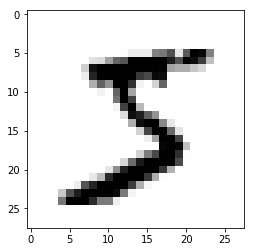

In [22]:
mnist_dataset = np.memmap('train-images-idx3-ubyte', offset=16, shape=(60000, 28, 28))
first_image = mnist_dataset[0].tolist() # first_image est de taille (28, 28)
plt.imshow(first_image, cmap='gray_r')
plt.show()